In [3]:
import pandas as pd
import seaborn as sns

sales_url = r"C:\Users\fomin\Analytics\Kaggle_datasets\Zara\zara_sales.csv"
sales = pd.read_csv(sales_url, sep = ';')

sales.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [4]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [5]:
sales.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [6]:
sales.shape

(252, 16)

In [7]:
sales.columns = sales.columns.str.lower().str.replace(' ', '_')

In [8]:
sales['revenue_by_item'] = sales.sales_volume * sales.price

In [9]:
sales.head()

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN,408938.00


In [10]:
sales[['product_id', 'revenue_by_item']].sort_values('revenue_by_item')

,product_id,revenue_by_item
162,136738,4330.58
203,171776,21888.15
189,185307,21916.57
234,185774,22888.55
210,142257,23482.00
...,...,...
169,152563,434668.00
67,154016,447174.00
87,152723,481481.00
38,114877,649140.00


In [11]:
sales.groupby('name', as_index=False).agg({'revenue_by_item':'sum'}).sort_values('revenue_by_item')

,name,revenue_by_item
78,HIGH COLLAR KNIT SWEATER,4330.58
51,DENIM SHIRT,21888.15
15,BASIC 100% WOOL SWEATER,21916.57
21,BASIC SLIM FIT T-SHIRT,23482.00
134,RETRO SNEAKERS,24885.09
...,...,...
136,RIB COLLAR JACKET,685883.00
118,PLAID OVERSHIRT,695369.00
57,FAUX LEATHER BOMBER JACKET,798852.60
163,SUIT JACKET IN 100% LINEN,816675.00


In [12]:
sales.price.sort_values()

189      7.99
162      7.99
140      9.99
139      9.99
249     12.99
        ...  
67     189.00
60     299.00
22     299.00
38     349.00
13     439.00
Name: price, Length: 252, dtype: float64

In [13]:
is_null_df = sales.isnull()

row_with_null = is_null_df.any(axis=1)

rows_with_null = sales[row_with_null]

rows_with_null

# поиск строк, где есть хотя бы одно нулевое значение
# можно дропнуть эти строки из датафрейма, учтя выручку с товаров в них

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN,651521.0
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN,237102.0


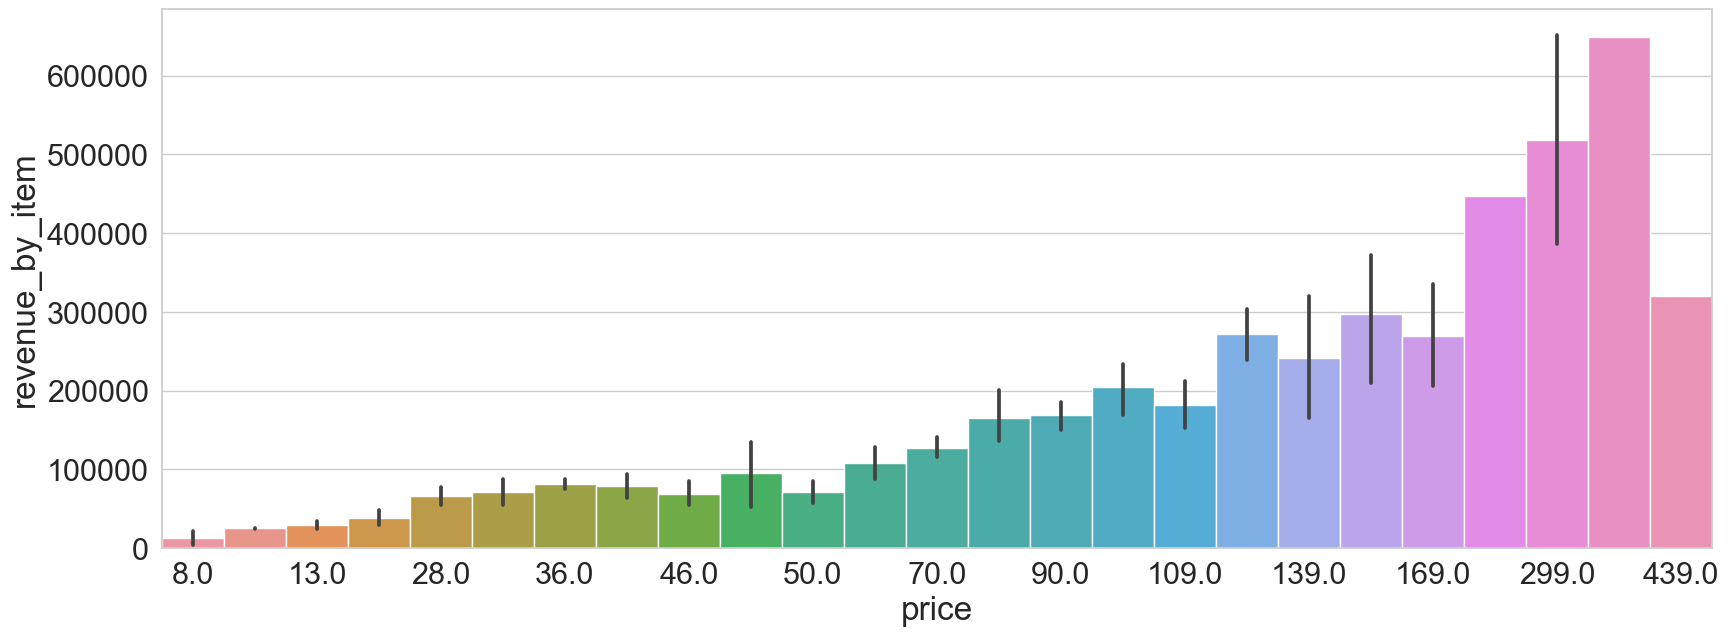

In [14]:
ax = sns.barplot(x=sales.price.round(0), y=sales.revenue_by_item, width = 1)

ax.set_xticks(ax.get_xticks()[::2])

# кластеризуй эти данные по ценам, когда изучишь кластеризацию

<Axes: xlabel='section', ylabel='count'>

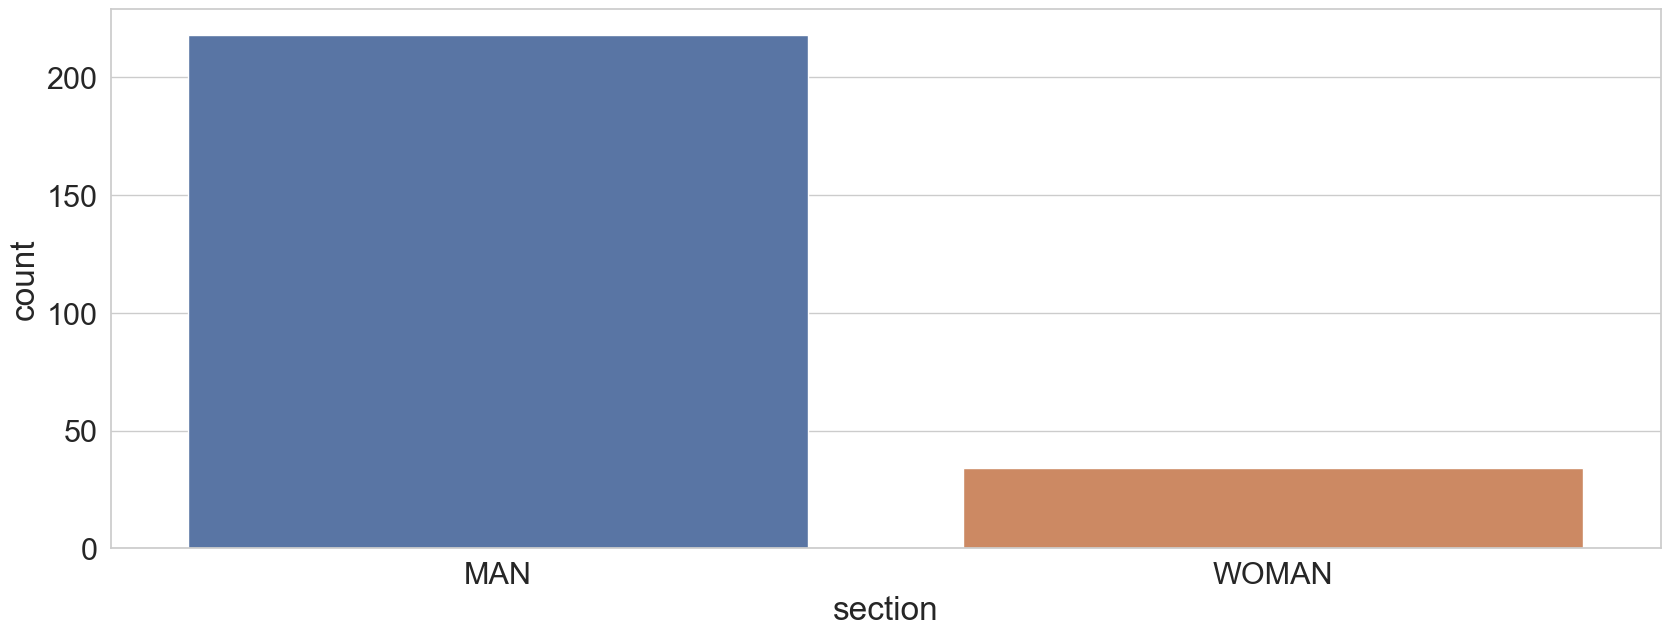

In [15]:
import seaborn as sns

sns.countplot(sales, x = "section")